In [27]:
# Data manipulation dan analisis
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                           roc_curve, auc, roc_auc_score, precision_recall_curve)

# Model persistence
import joblib
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        plt.style.use('default')
        print("⚠️ Using default matplotlib style")
    
try:
    sns.set_palette("husl")
except:
    print("⚠️ Could not set seaborn palette")

print("✅ Semua library berhasil diimport!")


✅ Semua library berhasil diimport!


In [28]:
# Load dataset
try:
    df = pd.read_csv('Social_Network_Ads.csv')
    print("✅ Dataset berhasil dimuat!")
    print(f"📊 Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print("❌ File 'Social_Network_Ads.csv' tidak ditemukan!")
    print("📁 Pastikan file berada di direktori yang sama dengan notebook ini")
    # Exit jika file tidak ditemukan
    raise
    
# Tampilkan beberapa baris pertama
print("\n🔍 5 baris pertama dataset:")
display(df.head())


✅ Dataset berhasil dimuat!
📊 Ukuran dataset: 400 baris, 5 kolom

🔍 5 baris pertama dataset:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
# Informasi umum dataset
print("📋 INFORMASI UMUM DATASET")
print("=" * 50)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Kolom: {list(df.columns)}")

print("\n📊 TIPE DATA:")
print(df.dtypes)

print("\n🔍 INFORMASI STATISTIK:")
print(df.describe())

print("\n❓ MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✅ Tidak ada missing values!")
else:
    print("⚠️ Ada missing values yang perlu ditangani")


📋 INFORMASI UMUM DATASET
Jumlah baris: 400
Jumlah kolom: 5
Kolom: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

📊 TIPE DATA:
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

🔍 INFORMASI STATISTIK:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

❓ MISSING VALUES:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
✅ Tid

🎯 DISTRIBUSI TARGET VARIABLE (Purchased)
Jumlah:
Purchased
0    257
1    143
Name: count, dtype: int64

Persentase:
  0: 64.2%
  1: 35.8%


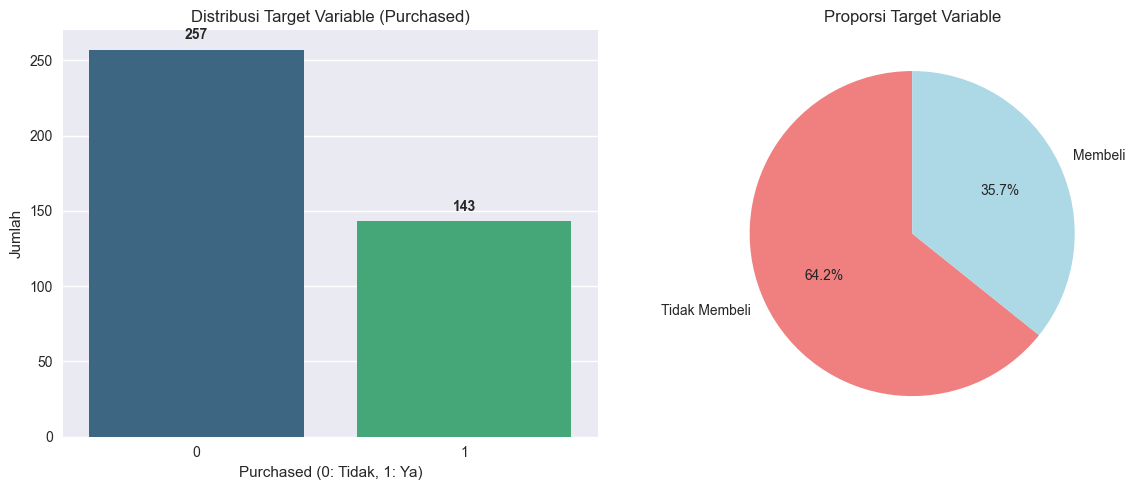


⚖️ Balance Ratio: 0.56
❌ Dataset tidak seimbang - pertimbangkan teknik balancing


In [30]:
# Analisis distribusi target variable
print("🎯 DISTRIBUSI TARGET VARIABLE (Purchased)")
print("=" * 50)

# Hitung distribusi
target_counts = df['Purchased'].value_counts()
target_percentage = df['Purchased'].value_counts(normalize=True) * 100

print("Jumlah:")
print(target_counts)
print("\nPersentase:")
for idx, val in target_percentage.items():
    print(f"  {idx}: {val:.1f}%")

# Visualisasi distribusi target
plt.figure(figsize=(12, 5))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
try:
    sns.countplot(data=df, x='Purchased', palette='viridis')
except:
    # Fallback untuk versi seaborn yang lebih lama
    sns.countplot(x='Purchased', data=df, palette='viridis')
    
plt.title('Distribusi Target Variable (Purchased)')
plt.xlabel('Purchased (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')

# Tambahkan label pada bar
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['Tidak Membeli', 'Membeli'], 
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Proporsi Target Variable')

plt.tight_layout()
plt.show()

# Cek balance dataset
balance_ratio = min(target_counts) / max(target_counts)
print(f"\n⚖️ Balance Ratio: {balance_ratio:.2f}")
if balance_ratio > 0.8:
    print("✅ Dataset cukup seimbang")
elif balance_ratio > 0.6:
    print("⚠️ Dataset sedikit tidak seimbang")
else:
    print("❌ Dataset tidak seimbang - pertimbangkan teknik balancing")


📊 ANALISIS DISTRIBUSI VARIABEL NUMERIK
Statistik Deskriptif:
              Age  EstimatedSalary
count  400.000000       400.000000
mean    37.655000     69742.500000
std     10.482877     34096.960282
min     18.000000     15000.000000
25%     29.750000     43000.000000
50%     37.000000     70000.000000
75%     46.000000     88000.000000
max     60.000000    150000.000000


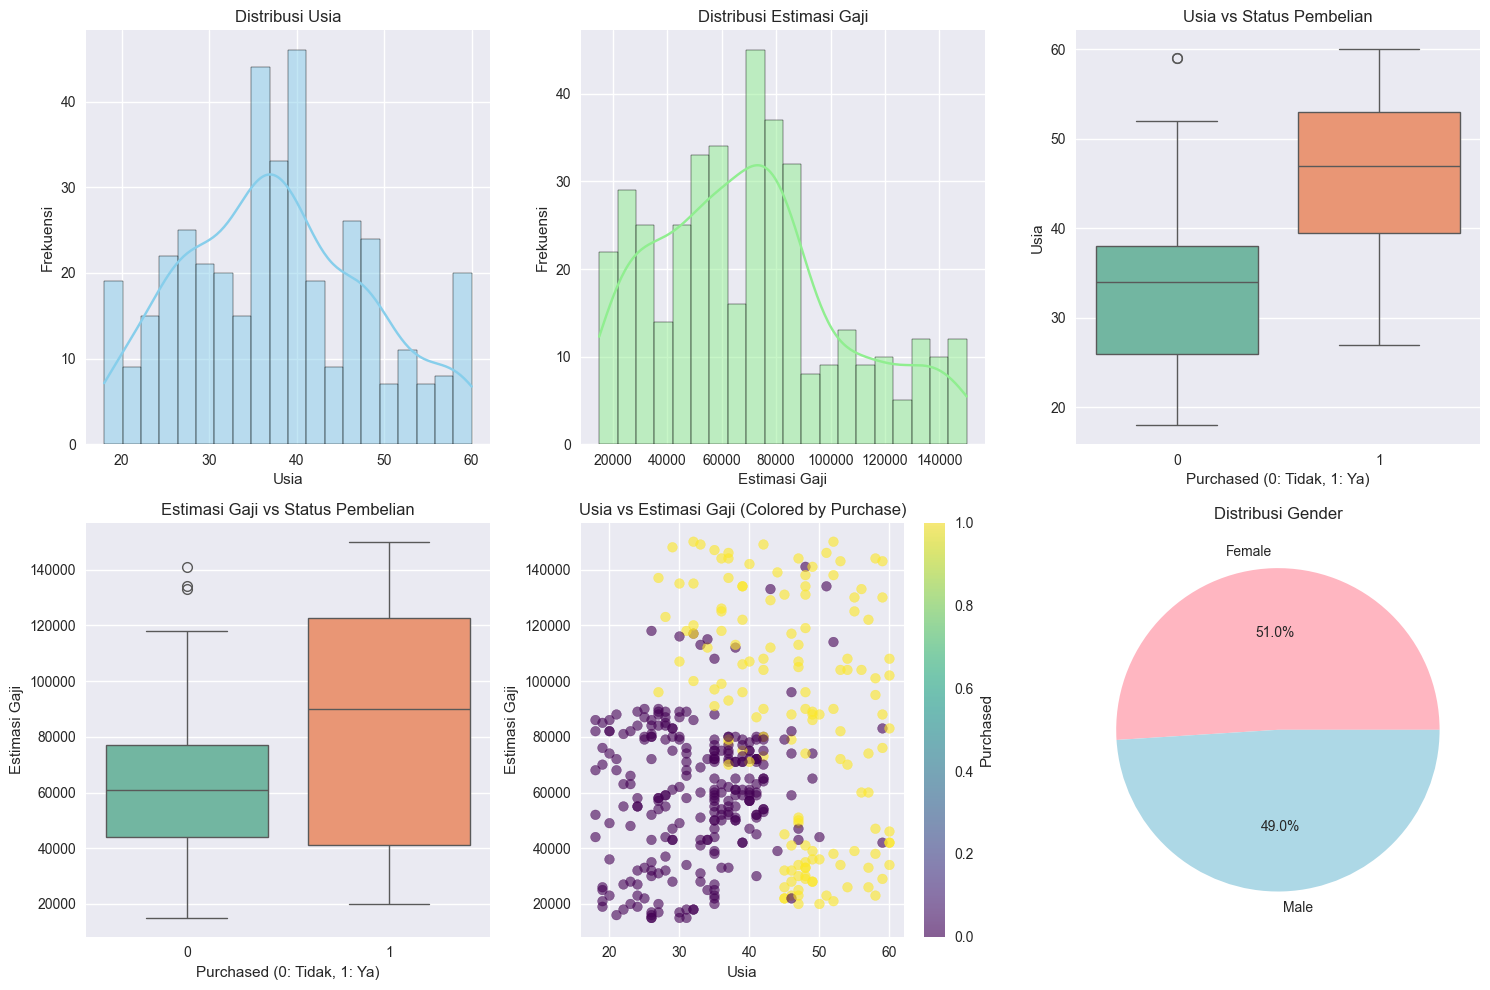

In [ ]:
# Analisis distribusi variabel numerik
print("📊 ANALISIS DISTRIBUSI VARIABEL NUMERIK")
print("=" * 50)

# Statistik deskriptif untuk Age dan EstimatedSalary
numeric_cols = ['Age', 'EstimatedSalary']
print("Statistik Deskriptif:")
print(df[numeric_cols].describe())

# Visualisasi distribusi
plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 3, 1)
try:
    sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
except:
    # Fallback untuk versi seaborn yang lebih lama
    try:
        sns.distplot(df['Age'], bins=20, kde=True, color='skyblue')
    except:
        # Fallback ke matplotlib histogram
        plt.hist(df['Age'], bins=20, alpha=0.7, color='skyblue')
        plt.ylabel('Frekuensi')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

# EstimatedSalary distribution
plt.subplot(2, 3, 2)
try:
    sns.histplot(data=df, x='EstimatedSalary', bins=20, kde=True, color='lightgreen')
except:
    # Fallback untuk versi seaborn yang lebih lama
    try:
        sns.distplot(df['EstimatedSalary'], bins=20, kde=True, color='lightgreen')
    except:
        # Fallback ke matplotlib histogram
        plt.hist(df['EstimatedSalary'], bins=20, alpha=0.7, color='lightgreen')
        plt.ylabel('Frekuensi')
plt.title('Distribusi Estimasi Gaji')
plt.xlabel('Estimasi Gaji')
plt.ylabel('Frekuensi')

# Age vs Purchased
plt.subplot(2, 3, 3)
try:
    sns.boxplot(data=df, x='Purchased', y='Age', palette='Set2')
except:
    # Fallback untuk versi seaborn yang lebih lama
    sns.boxplot(x='Purchased', y='Age', data=df, palette='Set2')
plt.title('Usia vs Status Pembelian')
plt.xlabel('Purchased (0: Tidak, 1: Ya)')
plt.ylabel('Usia')

# EstimatedSalary vs Purchased
plt.subplot(2, 3, 4)
try:
    sns.boxplot(data=df, x='Purchased', y='EstimatedSalary', palette='Set2')
except:
    # Fallback untuk versi seaborn yang lebih lama
    sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, palette='Set2')
plt.title('Estimasi Gaji vs Status Pembelian')
plt.xlabel('Purchased (0: Tidak, 1: Ya)')
plt.ylabel('Estimasi Gaji')

# Age vs EstimatedSalary scatter plot
plt.subplot(2, 3, 5)
scatter = plt.scatter(df['Age'], df['EstimatedSalary'], 
                     c=df['Purchased'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Purchased')
plt.title('Usia vs Estimasi Gaji (Colored by Purchase)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')

# Gender distribution
plt.subplot(2, 3, 6)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['lightpink', 'lightblue'])
plt.title('Distribusi Gender')

plt.tight_layout()
plt.show()


🔗 ANALISIS KORELASI DAN HUBUNGAN ANTAR VARIABEL
📊 Crosstab: Gender vs Purchased
Purchased    0    1  All
Gender                  
Female     127   77  204
Male       130   66  196
All        257  143  400

📈 Persentase Pembelian berdasarkan Gender:
Purchased          0          1
Gender                         
Female     62.254902  37.745098
Male       66.326531  33.673469


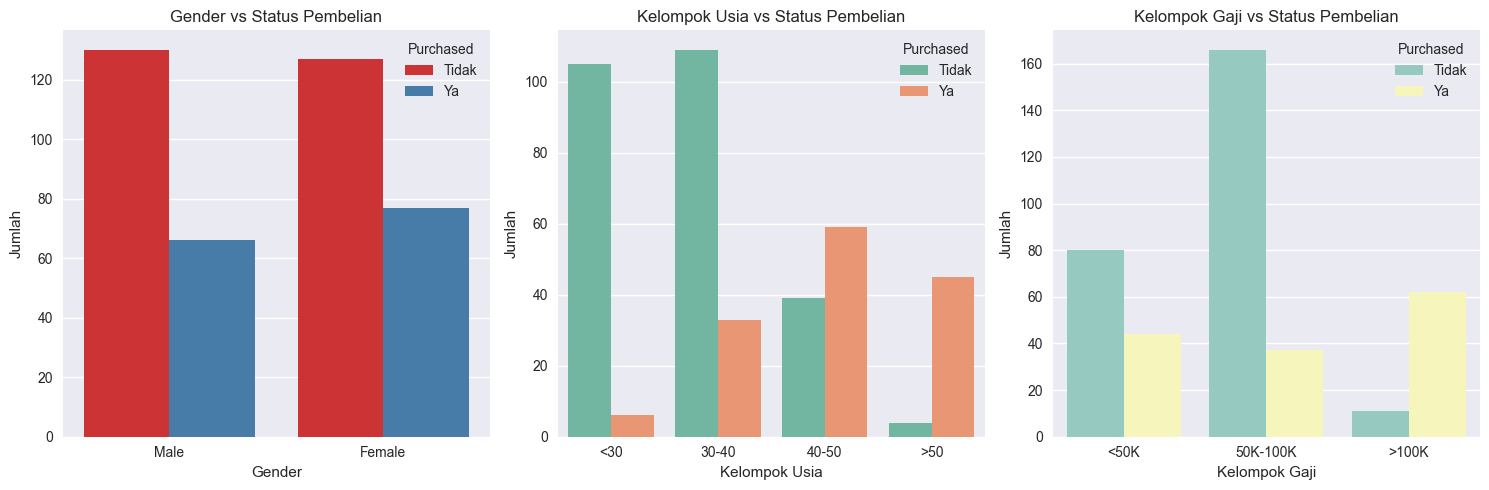


📊 Tingkat Pembelian per Kelompok:
Gender:
  Male: 33.7%
  Female: 37.7%

Kelompok Usia:
  <30: 5.4%
  30-40: 23.2%
  40-50: 60.2%
  >50: 91.8%

Kelompok Gaji:
  <50K: 35.5%
  50K-100K: 18.2%
  >100K: 84.9%


In [32]:
# Analisis korelasi dan crosstab
print("🔗 ANALISIS KORELASI DAN HUBUNGAN ANTAR VARIABEL")
print("=" * 50)

# Crosstab Gender vs Purchased
print("📊 Crosstab: Gender vs Purchased")
gender_purchased = pd.crosstab(df['Gender'], df['Purchased'], margins=True)
print(gender_purchased)

# Hitung persentase
print("\n📈 Persentase Pembelian berdasarkan Gender:")
gender_pct = pd.crosstab(df['Gender'], df['Purchased'], normalize='index') * 100
print(gender_pct)

# Visualisasi crosstab
plt.figure(figsize=(15, 5))

# Gender vs Purchased
plt.subplot(1, 3, 1)
try:
    sns.countplot(data=df, x='Gender', hue='Purchased', palette='Set1')
except:
    # Fallback untuk versi seaborn yang lebih lama
    sns.countplot(x='Gender', hue='Purchased', data=df, palette='Set1')
plt.title('Gender vs Status Pembelian')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Purchased', labels=['Tidak', 'Ya'])

# Age groups analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], 
                       labels=['<30', '30-40', '40-50', '>50'])

plt.subplot(1, 3, 2)
try:
    sns.countplot(data=df, x='AgeGroup', hue='Purchased', palette='Set2')
except:
    # Fallback untuk versi seaborn yang lebih lama
    sns.countplot(x='AgeGroup', hue='Purchased', data=df, palette='Set2')
plt.title('Kelompok Usia vs Status Pembelian')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.legend(title='Purchased', labels=['Tidak', 'Ya'])

# Salary groups analysis
df['SalaryGroup'] = pd.cut(df['EstimatedSalary'], bins=[0, 50000, 100000, 200000], 
                          labels=['<50K', '50K-100K', '>100K'])

plt.subplot(1, 3, 3)
try:
    sns.countplot(data=df, x='SalaryGroup', hue='Purchased', palette='Set3')
except:
    # Fallback untuk versi seaborn yang lebih lama
    sns.countplot(x='SalaryGroup', hue='Purchased', data=df, palette='Set3')
plt.title('Kelompok Gaji vs Status Pembelian')
plt.xlabel('Kelompok Gaji')
plt.ylabel('Jumlah')
plt.legend(title='Purchased', labels=['Tidak', 'Ya'])

plt.tight_layout()
plt.show()

# Analisis statistik per grup
print("\n📊 Tingkat Pembelian per Kelompok:")
print(f"Gender:")
for gender in df['Gender'].unique():
    purchase_rate = df[df['Gender'] == gender]['Purchased'].mean() * 100
    print(f"  {gender}: {purchase_rate:.1f}%")

print(f"\nKelompok Usia:")
for age_group in df['AgeGroup'].unique():
    if pd.notna(age_group):
        purchase_rate = df[df['AgeGroup'] == age_group]['Purchased'].mean() * 100
        print(f"  {age_group}: {purchase_rate:.1f}%")

print(f"\nKelompok Gaji:")
for salary_group in df['SalaryGroup'].unique():
    if pd.notna(salary_group):
        purchase_rate = df[df['SalaryGroup'] == salary_group]['Purchased'].mean() * 100
        print(f"  {salary_group}: {purchase_rate:.1f}%")


In [33]:
# Data Preprocessing
print("🔧 DATA PREPROCESSING")
print("=" * 50)

# Buat copy dataset untuk preprocessing
df_processed = df.copy()

# 1. Drop kolom User ID (tidak relevan untuk prediksi)
if 'User ID' in df_processed.columns:
    df_processed = df_processed.drop('User ID', axis=1)
    print("✅ Kolom 'User ID' berhasil dihapus")
else:
    print("ℹ️ Kolom 'User ID' tidak ditemukan")

# 2. Encode kolom Gender ke numerik
print("\n🔄 Encoding Gender ke numerik...")
label_encoder = LabelEncoder()
df_processed['Gender_encoded'] = label_encoder.fit_transform(df_processed['Gender'])

# Tampilkan mapping
gender_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Gender mapping: {gender_mapping}")

# Drop kolom Gender asli
df_processed = df_processed.drop('Gender', axis=1)

# Drop kolom kategori tambahan yang dibuat untuk EDA
columns_to_drop = ['AgeGroup', 'SalaryGroup']
for col in columns_to_drop:
    if col in df_processed.columns:
        df_processed = df_processed.drop(col, axis=1)

print(f"\n📊 Dataset setelah preprocessing:")
print(f"Shape: {df_processed.shape}")
print(f"Columns: {list(df_processed.columns)}")
print("\nSample data:")
print(df_processed.head())


🔧 DATA PREPROCESSING
✅ Kolom 'User ID' berhasil dihapus

🔄 Encoding Gender ke numerik...
Gender mapping: {'Female': 0, 'Male': 1}

📊 Dataset setelah preprocessing:
Shape: (400, 4)
Columns: ['Age', 'EstimatedSalary', 'Purchased', 'Gender_encoded']

Sample data:
   Age  EstimatedSalary  Purchased  Gender_encoded
0   19            19000          0               1
1   35            20000          0               1
2   26            43000          0               0
3   27            57000          0               0
4   19            76000          0               1


In [34]:
# 3. Pisahkan fitur dan target
print("\n🎯 Memisahkan fitur dan target...")

# Fitur (X) - semua kolom kecuali 'Purchased'
feature_columns = ['Age', 'EstimatedSalary', 'Gender_encoded']
X = df_processed[feature_columns]
y = df_processed['Purchased']

print(f"Fitur (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Nama fitur: {feature_columns}")

# 4. Train-Test Split (80:20)
print("\n✂️ Membagi data menjadi training dan testing...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Cek distribusi target di train dan test
print(f"\nDistribusi target di training set:")
print(y_train.value_counts())
print(f"\nDistribusi target di testing set:")
print(y_test.value_counts())



🎯 Memisahkan fitur dan target...
Fitur (X): (400, 3)
Target (y): (400,)
Nama fitur: ['Age', 'EstimatedSalary', 'Gender_encoded']

✂️ Membagi data menjadi training dan testing...
Training set: 320 samples
Testing set: 80 samples

Distribusi target di training set:
Purchased
0    206
1    114
Name: count, dtype: int64

Distribusi target di testing set:
Purchased
0    51
1    29
Name: count, dtype: int64


In [35]:
# 5. Normalisasi fitur (StandardScaler)
print("\n📏 Normalisasi fitur menggunakan StandardScaler...")

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform pada training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert kembali ke DataFrame untuk kemudahan
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("✅ Normalisasi selesai!")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

# Tampilkan statistik sebelum dan sesudah normalisasi
print("\n📊 Perbandingan statistik sebelum dan sesudah normalisasi:")
print("\nSebelum normalisasi (Training):")
print(X_train.describe())
print("\nSesudah normalisasi (Training):")
print(X_train_scaled.describe())



📏 Normalisasi fitur menggunakan StandardScaler...
✅ Normalisasi selesai!
Training data shape: (320, 3)
Testing data shape: (80, 3)

📊 Perbandingan statistik sebelum dan sesudah normalisasi:

Sebelum normalisasi (Training):
              Age  EstimatedSalary  Gender_encoded
count  320.000000        320.00000      320.000000
mean    37.156250      70793.75000        0.459375
std     10.674169      34820.83059        0.499127
min     18.000000      15000.00000        0.000000
25%     29.000000      43750.00000        0.000000
50%     36.000000      70500.00000        0.000000
75%     46.000000      88000.00000        1.000000
max     60.000000     150000.00000        1.000000

Sesudah normalisasi (Training):
                Age  EstimatedSalary  Gender_encoded
count  3.200000e+02     3.200000e+02    3.200000e+02
mean   8.326673e-18    -8.326673e-18    7.216450e-17
std    1.001566e+00     1.001566e+00    1.001566e+00
min   -1.797447e+00    -1.604819e+00   -9.217977e-01
25%   -7.653077e-01

🌲 PELATIHAN MODEL - RANDOM FOREST CLASSIFIER
1️⃣ Training model dengan parameter default...
✅ Training selesai!
Training Accuracy: 0.9969
Testing Accuracy: 0.9000

📊 Feature Importance:
           feature  importance
0              Age    0.506131
1  EstimatedSalary    0.484726
2   Gender_encoded    0.009143


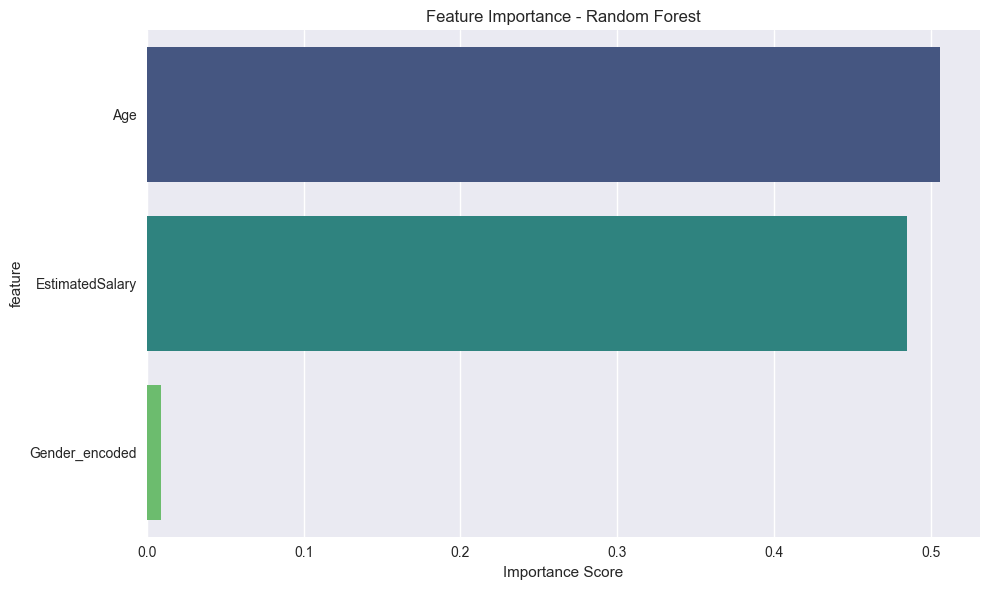

In [36]:
# Pelatihan Model dengan Random Forest Classifier
print("🌲 PELATIHAN MODEL - RANDOM FOREST CLASSIFIER")
print("=" * 60)

# 1. Model dengan parameter default
print("1️⃣ Training model dengan parameter default...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediksi pada data training dan testing
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Evaluasi awal
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"✅ Training selesai!")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n📊 Feature Importance:")
print(feature_importance)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [37]:
# 2. Hyperparameter Tuning dengan GridSearchCV
print("\n2️⃣ Hyperparameter Tuning dengan GridSearchCV...")
print("⏳ Ini mungkin memakan waktu beberapa menit...")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"\n🏆 Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train model dengan best parameters
best_rf_model = grid_search.best_estimator_
y_train_pred_best = best_rf_model.predict(X_train_scaled)
y_test_pred_best = best_rf_model.predict(X_test_scaled)

train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"\n✅ Model dengan best parameters:")
print(f"Training Accuracy: {train_accuracy_best:.4f}")
print(f"Testing Accuracy: {test_accuracy_best:.4f}")

# Perbandingan model
print(f"\n📈 Perbandingan Model:")
print(f"Default Model - Test Accuracy: {test_accuracy:.4f}")
print(f"Tuned Model - Test Accuracy: {test_accuracy_best:.4f}")
print(f"Improvement: {test_accuracy_best - test_accuracy:.4f}")

# Pilih model terbaik
final_model = best_rf_model if test_accuracy_best > test_accuracy else rf_model
final_predictions = y_test_pred_best if test_accuracy_best > test_accuracy else y_test_pred
final_accuracy = test_accuracy_best if test_accuracy_best > test_accuracy else test_accuracy

print(f"\n🎯 Model Final: {'Tuned Model' if test_accuracy_best > test_accuracy else 'Default Model'}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")



2️⃣ Hyperparameter Tuning dengan GridSearchCV...
⏳ Ini mungkin memakan waktu beberapa menit...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

🏆 Best Parameters:
  max_depth: None
  max_features: sqrt
  min_samples_leaf: 2
  min_samples_split: 10
  n_estimators: 200

📊 Best Cross-Validation Score: 0.9187

✅ Model dengan best parameters:
Training Accuracy: 0.9375
Testing Accuracy: 0.9000

📈 Perbandingan Model:
Default Model - Test Accuracy: 0.9000
Tuned Model - Test Accuracy: 0.9000
Improvement: 0.0000

🎯 Model Final: Default Model
Final Test Accuracy: 0.9000


📊 EVALUASI MODEL KOMPREHENSIF
1️⃣ Confusion Matrix
[[46  5]
 [ 3 26]]


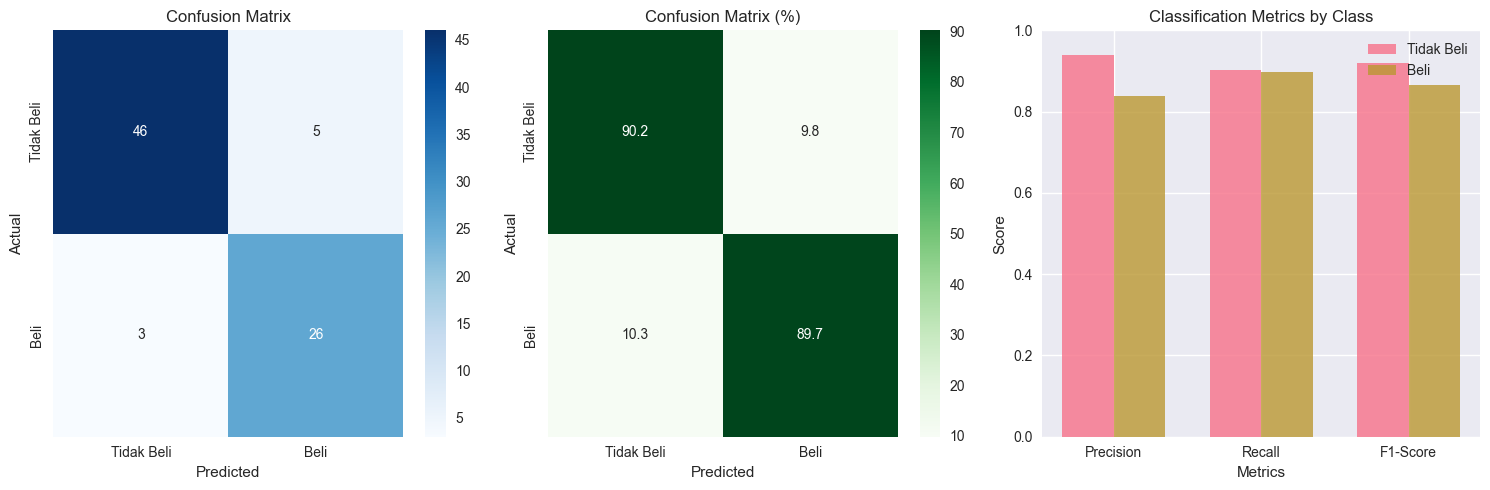


2️⃣ Classification Report
              precision    recall  f1-score   support

  Tidak Beli       0.94      0.90      0.92        51
        Beli       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



In [38]:
# Evaluasi Model Komprehensif
print("📊 EVALUASI MODEL KOMPREHENSIF")
print("=" * 50)

# 1. Confusion Matrix
print("1️⃣ Confusion Matrix")
cm = confusion_matrix(y_test, final_predictions)
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(15, 5))

# Confusion Matrix Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Beli', 'Beli'], 
            yticklabels=['Tidak Beli', 'Beli'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix dengan persentase
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
plt.subplot(1, 3, 2)
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Greens',
            xticklabels=['Tidak Beli', 'Beli'], 
            yticklabels=['Tidak Beli', 'Beli'])
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Classification Report Visualization
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_test, final_predictions)

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0 (Tidak Beli)': [precision[0], recall[0], f1[0]],
    'Class 1 (Beli)': [precision[1], recall[1], f1[1]]
})

plt.subplot(1, 3, 3)
x = np.arange(len(metrics_df))
width = 0.35

plt.bar(x - width/2, metrics_df['Class 0 (Tidak Beli)'], width, label='Tidak Beli', alpha=0.8)
plt.bar(x + width/2, metrics_df['Class 1 (Beli)'], width, label='Beli', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classification Metrics by Class')
plt.xticks(x, metrics_df['Metric'])
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# 2. Classification Report
print("\n2️⃣ Classification Report")
print(classification_report(y_test, final_predictions, 
                          target_names=['Tidak Beli', 'Beli']))


3️⃣ ROC Curve dan AUC Score
AUC Score: 0.9243


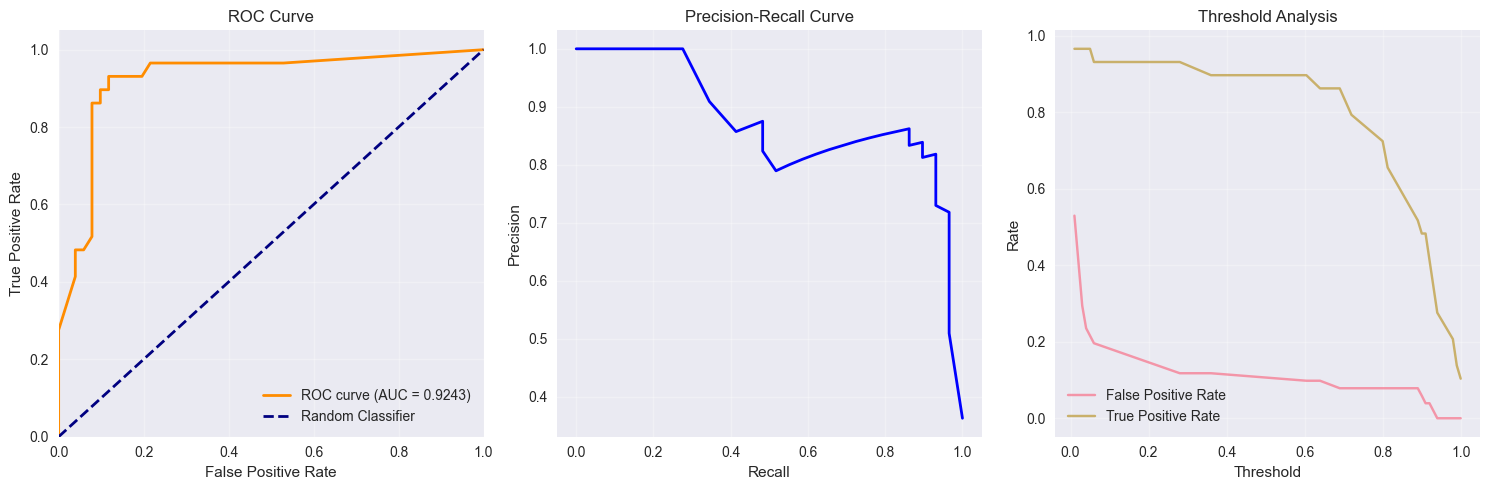


4️⃣ Cross-Validation Score
CV Scores: [0.921875 0.859375 0.96875  0.921875 0.859375]
Mean CV Score: 0.9062 (+/- 0.0839)

5️⃣ Detailed Metrics Summary
Accuracy: 0.9000
AUC Score: 0.9243
Precision (Class 1): 0.8387
Recall (Class 1): 0.8966
F1-Score (Class 1): 0.8667
Cross-Validation Score: 0.9062

🎯 INTERPRETASI MODEL:
✅ Model memiliki performa EXCELLENT (>85%)
✅ Model memiliki kemampuan diskriminasi EXCELLENT (AUC > 0.90)


In [39]:
# 3. ROC Curve dan AUC Score
print("3️⃣ ROC Curve dan AUC Score")

# Prediksi probabilitas
y_test_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Hitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Hitung AUC score
auc_score = roc_auc_score(y_test, y_test_proba)

print(f"AUC Score: {auc_score:.4f}")

# Visualisasi ROC Curve
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_test_proba)
plt.subplot(1, 3, 2)
plt.plot(recall_curve, precision_curve, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, alpha=0.3)

# Threshold Analysis
plt.subplot(1, 3, 3)
# Pastikan dimensi array sama
min_len = min(len(thresholds), len(fpr)-1, len(tpr)-1)
plt.plot(thresholds[:min_len], fpr[:min_len], label='False Positive Rate', alpha=0.7)
plt.plot(thresholds[:min_len], tpr[:min_len], label='True Positive Rate', alpha=0.7)
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Threshold Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Cross-Validation Score
print("\n4️⃣ Cross-Validation Score")
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 5. Detailed Metrics
print("\n5️⃣ Detailed Metrics Summary")
print("=" * 40)
print(f"Accuracy: {final_accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Precision (Class 1): {precision[1]:.4f}")
print(f"Recall (Class 1): {recall[1]:.4f}")
print(f"F1-Score (Class 1): {f1[1]:.4f}")
print(f"Cross-Validation Score: {cv_scores.mean():.4f}")

# Model interpretation
print(f"\n🎯 INTERPRETASI MODEL:")
print("=" * 40)
if final_accuracy > 0.85:
    print("✅ Model memiliki performa EXCELLENT (>85%)")
elif final_accuracy > 0.80:
    print("✅ Model memiliki performa GOOD (80-85%)")
elif final_accuracy > 0.75:
    print("⚠️ Model memiliki performa FAIR (75-80%)")
else:
    print("❌ Model memiliki performa POOR (<75%)")

if auc_score > 0.90:
    print("✅ Model memiliki kemampuan diskriminasi EXCELLENT (AUC > 0.90)")
elif auc_score > 0.80:
    print("✅ Model memiliki kemampuan diskriminasi GOOD (AUC > 0.80)")
else:
    print("⚠️ Model memiliki kemampuan diskriminasi FAIR (AUC < 0.80)")


🔮 PREDIKSI PADA DATA BARU
📊 Data baru untuk prediksi:
   Age  EstimatedSalary  Gender
0   25            50000    Male
1   35            80000  Female
2   45           120000    Male
3   30            60000  Female
4   50           100000    Male

🔧 Preprocessing data baru...
✅ Preprocessing selesai!

Data setelah preprocessing:
        Age  EstimatedSalary  Gender_encoded
0 -1.140631        -0.598099        1.084837
1 -0.202323         0.264803       -0.921798
2  0.735986         1.415340        1.084837
3 -0.671477        -0.310465       -0.921798
4  1.205140         0.840072        1.084837

🎯 HASIL PREDIKSI:
 Age  EstimatedSalary Gender  Prediction  Probability_Not_Buy  Probability_Buy           Decision
  25            50000   Male           0                 1.00             0.00 TIDAK AKAN MEMBELI
  35            80000 Female           0                 0.98             0.02 TIDAK AKAN MEMBELI
  45           120000   Male           1                 0.02             0.98       AK

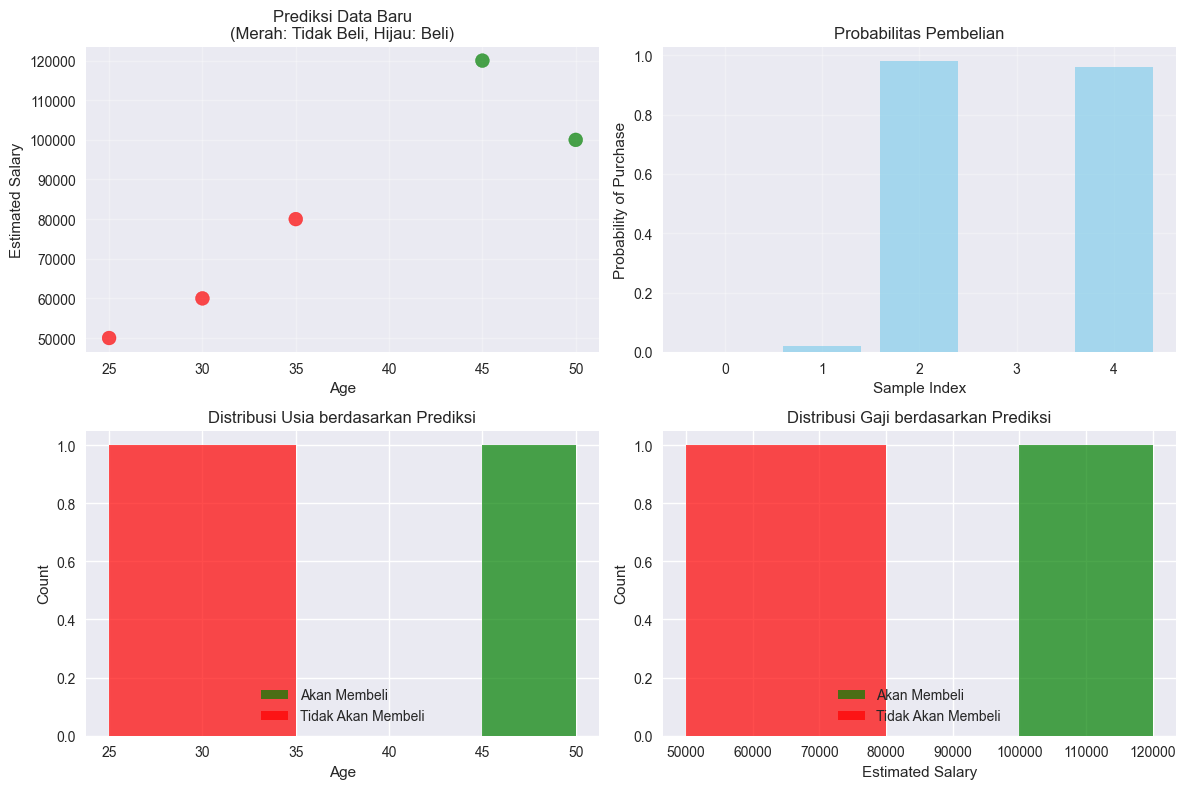


💡 INSIGHT DARI PREDIKSI:
Total sampel: 5
Diprediksi akan membeli: 2 (40.0%)
Diprediksi tidak akan membeli: 3 (60.0%)

Profil pembeli potensial:
  Rata-rata usia: 47.5 tahun
  Rata-rata gaji: $110,000

Profil non-pembeli:
  Rata-rata usia: 30.0 tahun
  Rata-rata gaji: $63,333


In [40]:
# Prediksi pada Data Baru
print("🔮 PREDIKSI PADA DATA BARU")
print("=" * 40)

# Contoh data baru untuk prediksi
new_data = pd.DataFrame({
    'Age': [25, 35, 45, 30, 50],
    'EstimatedSalary': [50000, 80000, 120000, 60000, 100000],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']
})

print("📊 Data baru untuk prediksi:")
print(new_data)

# Preprocessing data baru
print("\n🔧 Preprocessing data baru...")

# Encode gender
new_data['Gender_encoded'] = label_encoder.transform(new_data['Gender'])
new_data_processed = new_data[['Age', 'EstimatedSalary', 'Gender_encoded']]

# Normalisasi menggunakan scaler yang sama
new_data_scaled = scaler.transform(new_data_processed)
new_data_scaled = pd.DataFrame(new_data_scaled, columns=feature_columns)

print("✅ Preprocessing selesai!")
print("\nData setelah preprocessing:")
print(new_data_scaled)

# Prediksi
predictions = final_model.predict(new_data_scaled)
prediction_proba = final_model.predict_proba(new_data_scaled)

# Hasil prediksi
print("\n🎯 HASIL PREDIKSI:")
print("=" * 50)

results_df = pd.DataFrame({
    'Age': new_data['Age'],
    'EstimatedSalary': new_data['EstimatedSalary'],
    'Gender': new_data['Gender'],
    'Prediction': predictions,
    'Probability_Not_Buy': prediction_proba[:, 0],
    'Probability_Buy': prediction_proba[:, 1],
    'Decision': ['AKAN MEMBELI' if p == 1 else 'TIDAK AKAN MEMBELI' for p in predictions]
})

print(results_df.to_string(index=False))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 8))

# Scatter plot prediksi
plt.subplot(2, 2, 1)
colors = ['red' if p == 0 else 'green' for p in predictions]
plt.scatter(new_data['Age'], new_data['EstimatedSalary'], c=colors, s=100, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Prediksi Data Baru\n(Merah: Tidak Beli, Hijau: Beli)')
plt.grid(True, alpha=0.3)

# Bar plot probabilitas
plt.subplot(2, 2, 2)
x_pos = np.arange(len(new_data))
plt.bar(x_pos, prediction_proba[:, 1], alpha=0.7, color='skyblue')
plt.xlabel('Sample Index')
plt.ylabel('Probability of Purchase')
plt.title('Probabilitas Pembelian')
plt.xticks(x_pos)
plt.grid(True, alpha=0.3)

# Age distribution with prediction
plt.subplot(2, 2, 3)
buy_ages = new_data[predictions == 1]['Age']
not_buy_ages = new_data[predictions == 0]['Age']

# Hanya plot jika ada data
if len(buy_ages) > 0:
    plt.hist(buy_ages, bins=min(5, len(buy_ages)), alpha=0.7, label='Akan Membeli', color='green')
if len(not_buy_ages) > 0:
    plt.hist(not_buy_ages, bins=min(5, len(not_buy_ages)), alpha=0.7, label='Tidak Akan Membeli', color='red')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribusi Usia berdasarkan Prediksi')
plt.legend()

# Salary distribution with prediction
plt.subplot(2, 2, 4)
buy_salaries = new_data[predictions == 1]['EstimatedSalary']
not_buy_salaries = new_data[predictions == 0]['EstimatedSalary']

# Hanya plot jika ada data
if len(buy_salaries) > 0:
    plt.hist(buy_salaries, bins=min(5, len(buy_salaries)), alpha=0.7, label='Akan Membeli', color='green')
if len(not_buy_salaries) > 0:
    plt.hist(not_buy_salaries, bins=min(5, len(not_buy_salaries)), alpha=0.7, label='Tidak Akan Membeli', color='red')

plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.title('Distribusi Gaji berdasarkan Prediksi')
plt.legend()

plt.tight_layout()
plt.show()

# Insight dari prediksi
print(f"\n💡 INSIGHT DARI PREDIKSI:")
print("=" * 40)
buy_count = sum(predictions)
not_buy_count = len(predictions) - buy_count

print(f"Total sampel: {len(predictions)}")
print(f"Diprediksi akan membeli: {buy_count} ({buy_count/len(predictions)*100:.1f}%)")
print(f"Diprediksi tidak akan membeli: {not_buy_count} ({not_buy_count/len(predictions)*100:.1f}%)")

if buy_count > 0:
    avg_age_buyers = new_data[predictions == 1]['Age'].mean()
    avg_salary_buyers = new_data[predictions == 1]['EstimatedSalary'].mean()
    print(f"\nProfil pembeli potensial:")
    print(f"  Rata-rata usia: {avg_age_buyers:.1f} tahun")
    print(f"  Rata-rata gaji: ${avg_salary_buyers:,.0f}")

if not_buy_count > 0:
    avg_age_non_buyers = new_data[predictions == 0]['Age'].mean()
    avg_salary_non_buyers = new_data[predictions == 0]['EstimatedSalary'].mean()
    print(f"\nProfil non-pembeli:")
    print(f"  Rata-rata usia: {avg_age_non_buyers:.1f} tahun")
    print(f"  Rata-rata gaji: ${avg_salary_non_buyers:,.0f}")


In [41]:
# Simpan Model dan Preprocessing Objects
print("💾 MENYIMPAN MODEL DAN PREPROCESSING OBJECTS")
print("=" * 60)

# 1. Simpan model terbaik
model_filename = 'best_social_ads_model.pkl'
joblib.dump(final_model, model_filename)
print(f"✅ Model disimpan sebagai: {model_filename}")

# 2. Simpan scaler
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"✅ Scaler disimpan sebagai: {scaler_filename}")

# 3. Simpan label encoder
encoder_filename = 'label_encoder.pkl'
joblib.dump(label_encoder, encoder_filename)
print(f"✅ Label encoder disimpan sebagai: {encoder_filename}")

# 4. Simpan feature columns
feature_info = {
    'feature_columns': feature_columns,
    'gender_mapping': gender_mapping,
    'model_type': 'RandomForestClassifier',
    'model_performance': {
        'accuracy': final_accuracy,
        'auc_score': auc_score,
        'cv_score': cv_scores.mean()
    }
}

feature_info_filename = 'feature_info.pkl'
joblib.dump(feature_info, feature_info_filename)
print(f"✅ Feature info disimpan sebagai: {feature_info_filename}")

# 5. Simpan model metrics untuk referensi
model_metrics = {
    'confusion_matrix': cm.tolist(),
    'classification_report': classification_report(y_test, final_predictions, 
                                                 target_names=['Tidak Beli', 'Beli'], 
                                                 output_dict=True),
    'accuracy': final_accuracy,
    'auc_score': auc_score,
    'cv_scores': cv_scores.tolist(),
    'feature_importance': dict(zip(feature_columns, final_model.feature_importances_))
}

metrics_filename = 'model_metrics.pkl'
joblib.dump(model_metrics, metrics_filename)
print(f"✅ Model metrics disimpan sebagai: {metrics_filename}")

print(f"\n📁 Files yang telah disimpan:")
print(f"  1. {model_filename} - Model Random Forest")
print(f"  2. {scaler_filename} - StandardScaler")
print(f"  3. {encoder_filename} - LabelEncoder")
print(f"  4. {feature_info_filename} - Feature information")
print(f"  5. {metrics_filename} - Model metrics")

# Test loading model
print(f"\n🔍 Test loading model...")
try:
    loaded_model = joblib.load(model_filename)
    loaded_scaler = joblib.load(scaler_filename)
    loaded_encoder = joblib.load(encoder_filename)
    loaded_feature_info = joblib.load(feature_info_filename)
    
    print("✅ Semua file berhasil dimuat!")
    print(f"Model type: {type(loaded_model).__name__}")
    print(f"Feature columns: {loaded_feature_info['feature_columns']}")
    print(f"Model accuracy: {loaded_feature_info['model_performance']['accuracy']:.4f}")
    
except Exception as e:
    print(f"❌ Error saat loading: {e}")

print(f"\n🎉 Model siap digunakan untuk aplikasi Streamlit!")


💾 MENYIMPAN MODEL DAN PREPROCESSING OBJECTS
✅ Model disimpan sebagai: best_social_ads_model.pkl
✅ Scaler disimpan sebagai: scaler.pkl
✅ Label encoder disimpan sebagai: label_encoder.pkl
✅ Feature info disimpan sebagai: feature_info.pkl
✅ Model metrics disimpan sebagai: model_metrics.pkl

📁 Files yang telah disimpan:
  1. best_social_ads_model.pkl - Model Random Forest
  2. scaler.pkl - StandardScaler
  3. label_encoder.pkl - LabelEncoder
  4. feature_info.pkl - Feature information
  5. model_metrics.pkl - Model metrics

🔍 Test loading model...
✅ Semua file berhasil dimuat!
Model type: RandomForestClassifier
Feature columns: ['Age', 'EstimatedSalary', 'Gender_encoded']
Model accuracy: 0.9000

🎉 Model siap digunakan untuk aplikasi Streamlit!
